<a href="https://colab.research.google.com/github/anfalsiddiqui45/mental-health-models/blob/main/baseline_lr_tfdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

BASE_PATH = "/content/drive/MyDrive"

train_df = pd.read_csv(f"{BASE_PATH}/train.csv")
test_df  = pd.read_csv(f"{BASE_PATH}/test.csv")

X_train = train_df["statement"]
y_train = train_df["label"]

X_test = test_df["statement"]
y_test = test_df["label"]


In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

lr.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [10]:
y_pred = lr.predict(X_test_tfidf)


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

lr.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [12]:
y_pred = lr.predict(X_test_tfidf)


In [13]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        y_pred,
        target_names=["Normal", "Depression", "Anxiety", "Stress"]
    )
)


              precision    recall  f1-score   support

      Normal       0.92      0.92      0.92      3269
  Depression       0.94      0.87      0.90      3081
     Anxiety       0.78      0.84      0.81       768
      Stress       0.58      0.74      0.65       517

    accuracy                           0.88      7635
   macro avg       0.80      0.84      0.82      7635
weighted avg       0.89      0.88      0.88      7635



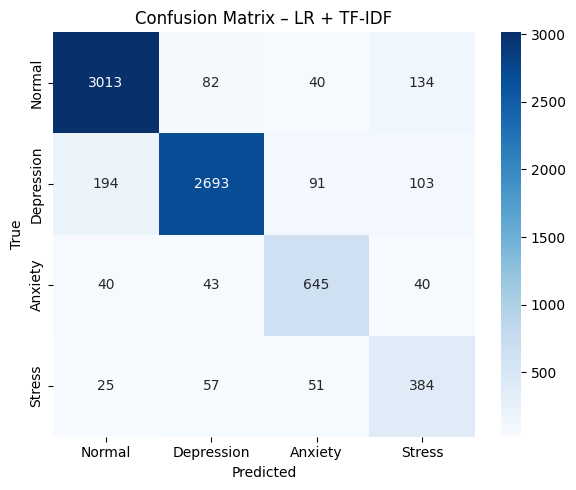

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

RESULTS_PATH = f"{BASE_PATH}/results"
os.makedirs(RESULTS_PATH, exist_ok=True)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Depression", "Anxiety", "Stress"],
    yticklabels=["Normal", "Depression", "Anxiety", "Stress"]
)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – LR + TF-IDF")
plt.tight_layout()
plt.savefig(f"{RESULTS_PATH}/confusion_matrix_lr_tfidf.png")
plt.show()


In [15]:
from sklearn.metrics import classification_report

report = classification_report(
    y_test,
    y_pred,
    target_names=["Normal", "Depression", "Anxiety", "Stress"],
    output_dict=True
)

pd.DataFrame(report).transpose().to_csv(
    f"{RESULTS_PATH}/lr_tfidf_classification_report.csv"
)
